In [1]:
%pylab inline
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy import stats
from sklearn.cluster import KMeans

Populating the interactive namespace from numpy and matplotlib


In [145]:
cd 1mw80l64n/

C:\Users\ChiefGuti\Documents\Lund University\Thesis\MLImplementacion\Nonlinear fiber\Zero Dispersion Fiber\1mw80l64n


In [158]:
data=loadtxt('N53L80x.txt')
Code=loadtxt('PBRS.txt', skiprows=5)
ser=loadtxt('SER.txt',skiprows=2)

In [159]:
def SER(x,y):
    j=0
    for i in range(len(x)):
        if(x[i]!=y[i]):
            j+=1
    return(j/len(x))
def ColorMap(Word,Map,M):
    Cmap=arange(M)
    for i in range(len(Word)):
        for j in range(len(Cmap)):
            if(Word[i]==Org[j]):
                Map[i]=Cmap[j]
def NormData(DataSet,data):
    for i in range(len(data[:,0])):
        DataSet[i,0]=data[:,0][i]
        DataSet[i,1]=data[:,1][i]
    DataSet[:,0]=DataSet[:,0]/max(DataSet[:,0])
    DataSet[:,1]=DataSet[:,1]/max(DataSet[:,1])

In [160]:
INT=[]
for i in range(int(len(Code)/4)):
    INT.append(i*4)
CodeWord=[]
for i in range(len(Code)):
    CodeWord.append(str(int(Code[i])))

Word=[]
Org=[]
j=0
for i in INT:
    Word.append(CodeWord[i]+CodeWord[i+1]+CodeWord[i+2]+CodeWord[i+3])
    
    if((Word[j] in Org)==False ):
        Org.append(Word[j])
    j=j+1
Map=zeros(len(Word))
ColorMap(Word,Map,16)

In [161]:
len(Word)

2048

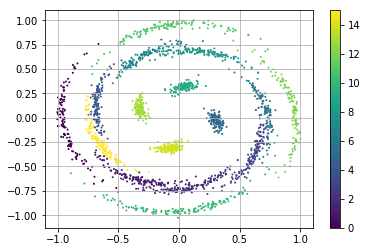

In [162]:
scatter(data[:,0]/max(data[:,0]),data[:,1]/max(data[:,1]),c=Map,s=1)
grid(True)
colorbar()

In [163]:
points=[]
for i in range(len(data)):
    points.append([data[:,0][i]/max(data[:,0]),data[:,1][i]/max(data[:,0])])

In [164]:
kmeans = KMeans(n_clusters=16, random_state=0).fit(points)

In [165]:
mapK=kmeans.labels_
center=kmeans.cluster_centers_

In [166]:
Voromap=zeros((16,2))
Class=arange(0,16)
for i in Class:
    Voromap[:,0][i]=where(Map==i)[0][0]
    Voromap[:,1][i]=mapK[where(Map==i)[0][0]]
mtest=zeros(len(mapK))
for i in range(len(Voromap)):
    serch=where(mapK==Voromap[:,1][i])[0]
    for j in serch:
        mtest[j]=i
mapK=mtest


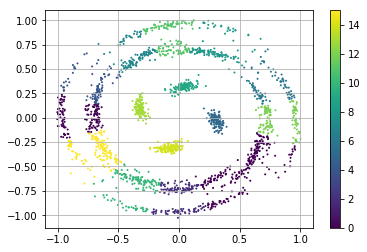

In [167]:
scatter(data[:,0]/max(data[:,0]),data[:,1]/max(data[:,1]),c=mapK,s=1)
grid(True)
colorbar()

In [168]:
 from scipy.spatial import Voronoi, voronoi_plot_2d

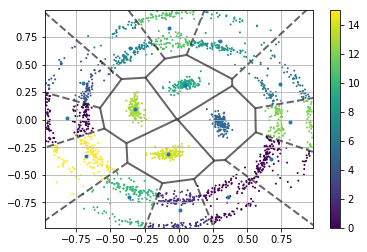

In [169]:
vor=Voronoi(center)
voronoi_plot_2d(vor, show_vertices=False, line_colors='black',line_width=2, line_alpha=0.6, point_size=2)
scatter(data[:,0]/max(data[:,0]),data[:,1]/max(data[:,1]),c=mapK,s=1)
grid(True)
colorbar()
savefig('voronoi.png')